In [271]:
import ndlib
import networkx as nx
import ndlib.models.ModelConfig as mc
import ndlib.models.epidemics as ep
import matplotlib.pyplot as plt
from ndlib.viz.mpl.DiffusionTrend import DiffusionTrend
from ndlib.viz.mpl.DiffusionPrevalence import DiffusionPrevalence

In [272]:
# directed graph of our network

g = nx.read_edgelist("D:/Dati PRAW/vecchi/SNA 14th commit/Project_Social_Network_Analysis-main/dati_ripuliti_edgelist.csv", delimiter=",", nodetype=str, create_using=nx.DiGraph())

n_nodes = g.number_of_nodes()
n_edges = g.number_of_edges()

print(n_nodes, ",", n_edges)

24819 , 107094


In [273]:
# infection rates (b) and recovery rates (u)
b1=0.071
u1=0.07
b2=0.115
u2=0.107
b3=0.01
u3=0.011
#print(b1,b2,b3,u1,u2,u3)

In [274]:
model = ep.SISModel(g)
model.available_statuses

{'Susceptible': 0, 'Infected': 1}

In [275]:
cfg = mc.Configuration()
cfg.add_model_parameter('beta', b1) # infection rate
cfg.add_model_parameter('lambda', u1) # recovery rate
#cfg.add_model_parameter("percentage_infected", 0.0001)
infected_nodes = ['wallstreetbets']
cfg.add_model_initial_configuration("Infected", infected_nodes)
model.set_initial_status(cfg)

In [276]:
iterations = model.iteration_bunch(10, node_status=True)
trends = model.build_trends(iterations)

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:02<00:00,  4.94it/s]


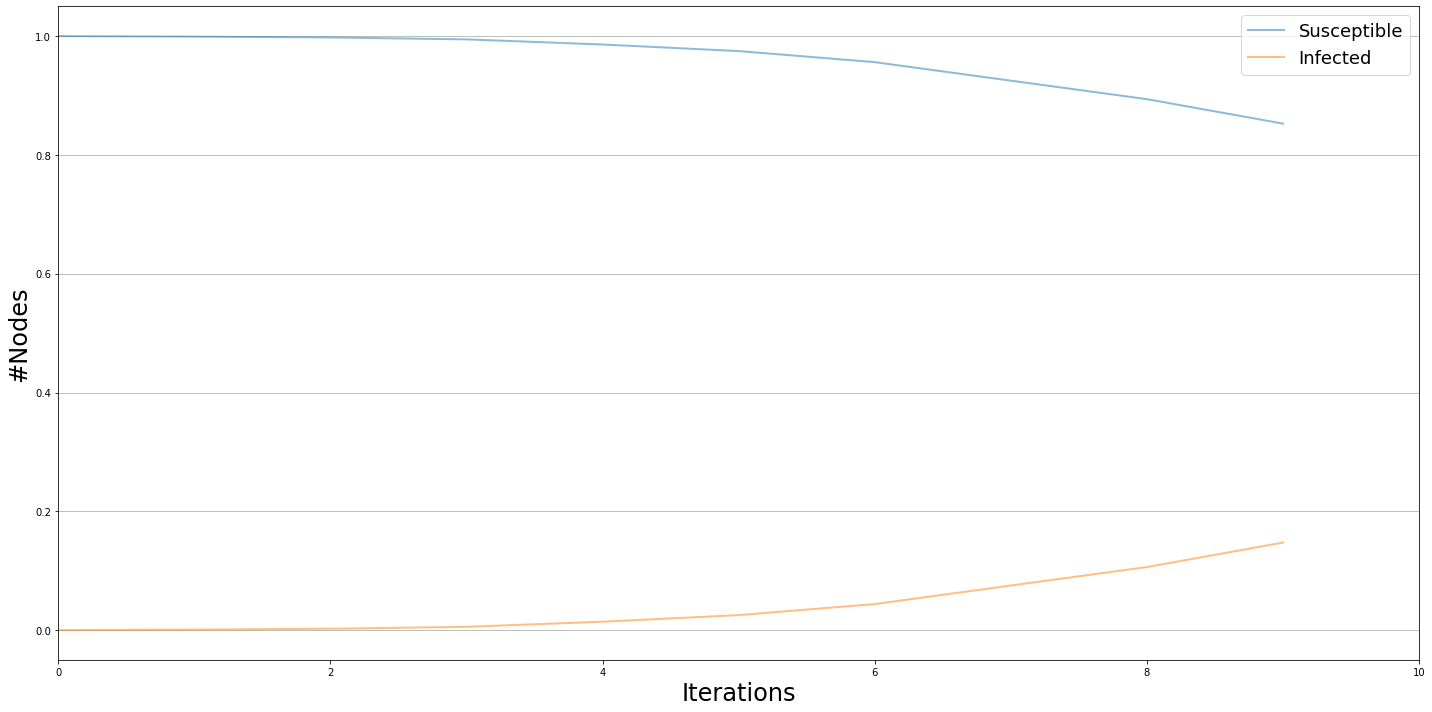

In [277]:
%matplotlib inline
viz = DiffusionTrend(model, trends)
viz.plot()

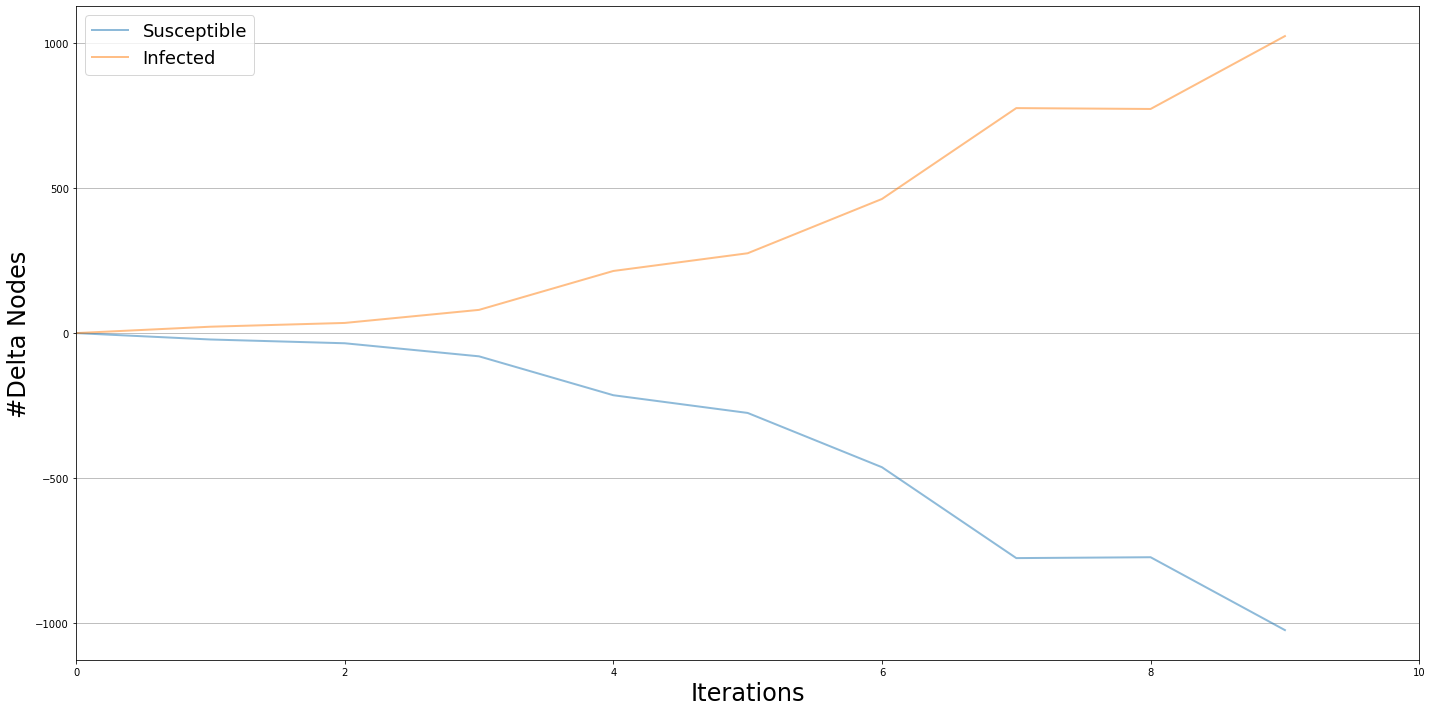

In [278]:
viz = DiffusionPrevalence(model, trends)
viz.plot()

In [286]:
model = ep.SISModel(g)
model.available_statuses

{'Susceptible': 0, 'Infected': 1}

In [287]:
# la % di già infetti presa per allineare con i dati di Paolo

cfg = mc.Configuration()
cfg.add_model_parameter('beta', b2) # infection rate
cfg.add_model_parameter('lambda', u2) # recovery rate
cfg.add_model_parameter("percentage_infected", 0.01)
model.set_initial_status(cfg)

In [288]:
iterations = model.iteration_bunch(16, node_status=True)
trends = model.build_trends(iterations)

100%|██████████████████████████████████████████████████████████████████████████████████| 16/16 [00:03<00:00,  5.06it/s]


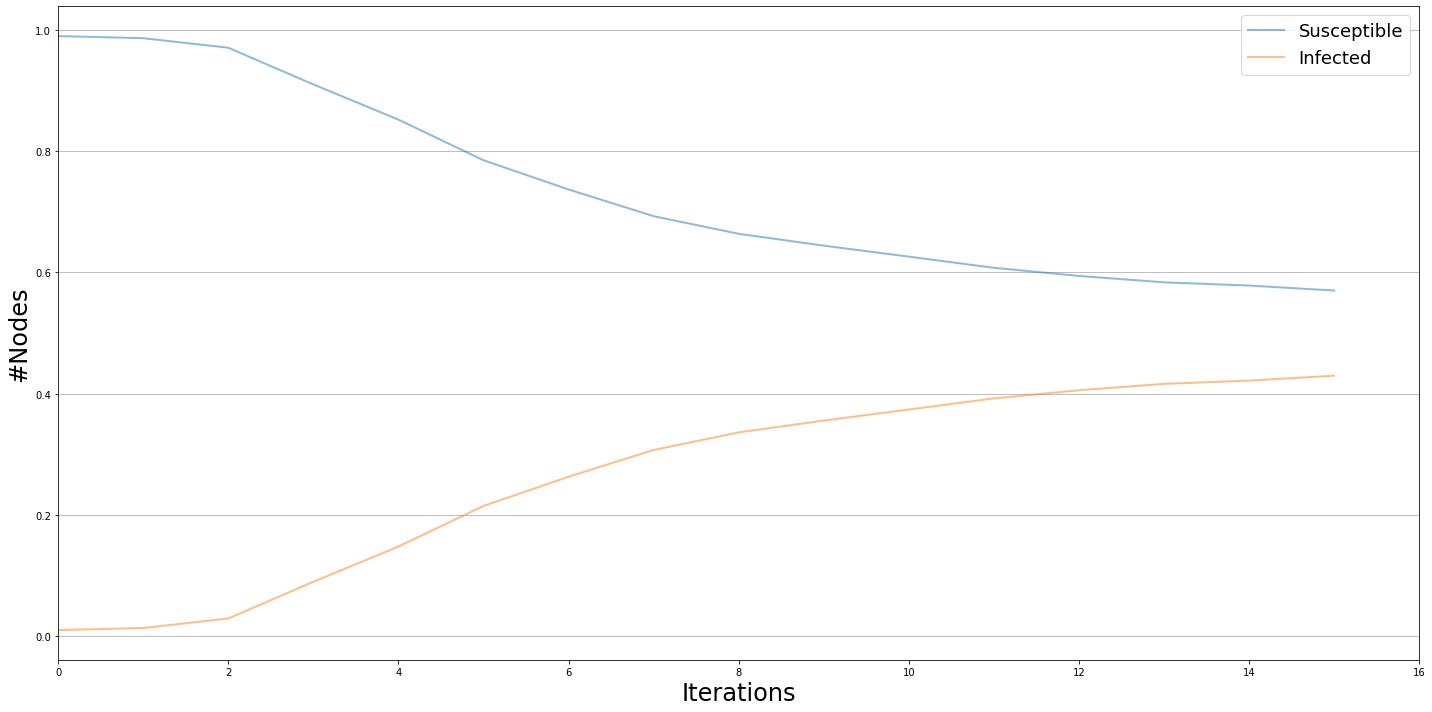

In [289]:
viz = DiffusionTrend(model, trends)
viz.plot()

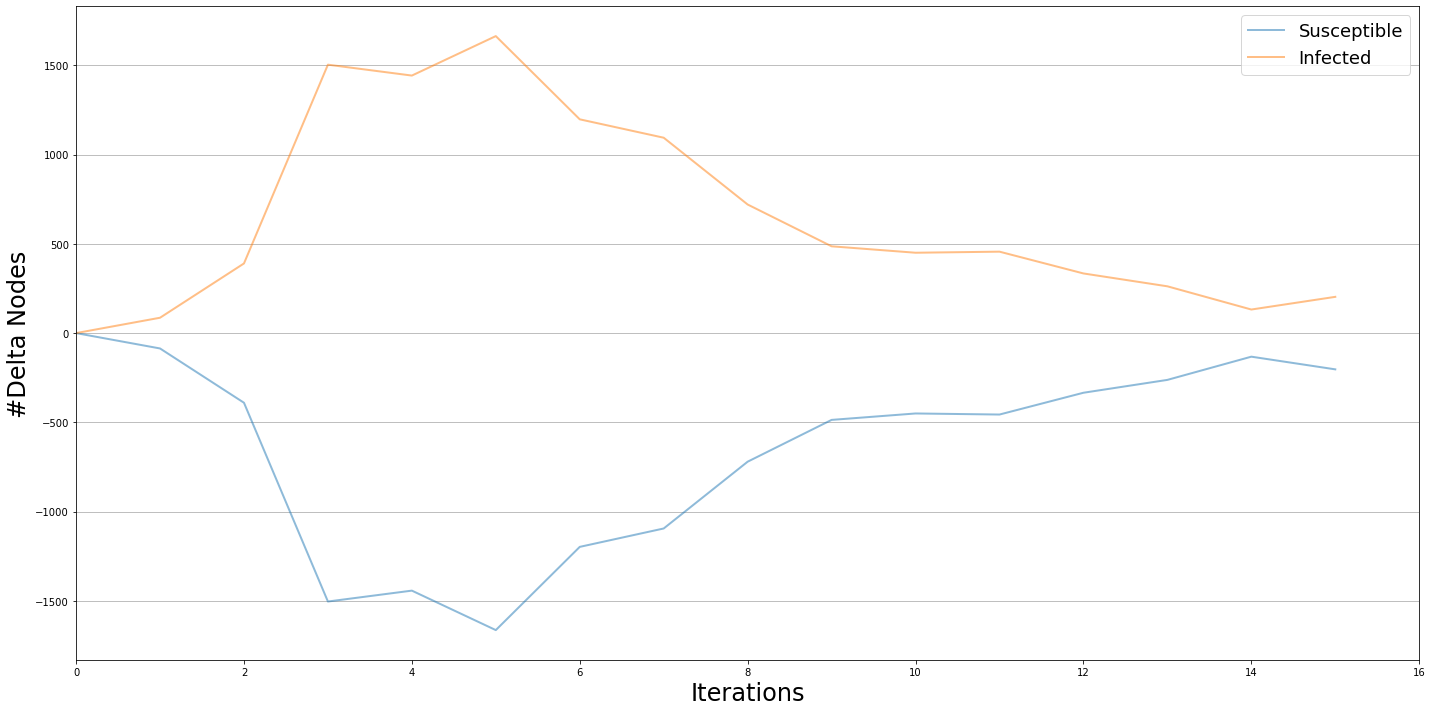

In [290]:
viz = DiffusionPrevalence(model, trends)
viz.plot()

In [296]:
model = ep.SISModel(g)
model.available_statuses

{'Susceptible': 0, 'Infected': 1}

In [297]:
# la % di già infetti presa per allineare con i dati di Paolo

cfg = mc.Configuration()
cfg.add_model_parameter('beta', b3) # infection rate
cfg.add_model_parameter('lambda', u3) # recovery rate
cfg.add_model_parameter("percentage_infected", 0.07)
model.set_initial_status(cfg)

In [298]:
iterations = model.iteration_bunch(25, node_status=True)
trends = model.build_trends(iterations)

100%|██████████████████████████████████████████████████████████████████████████████████| 25/25 [00:05<00:00,  4.30it/s]


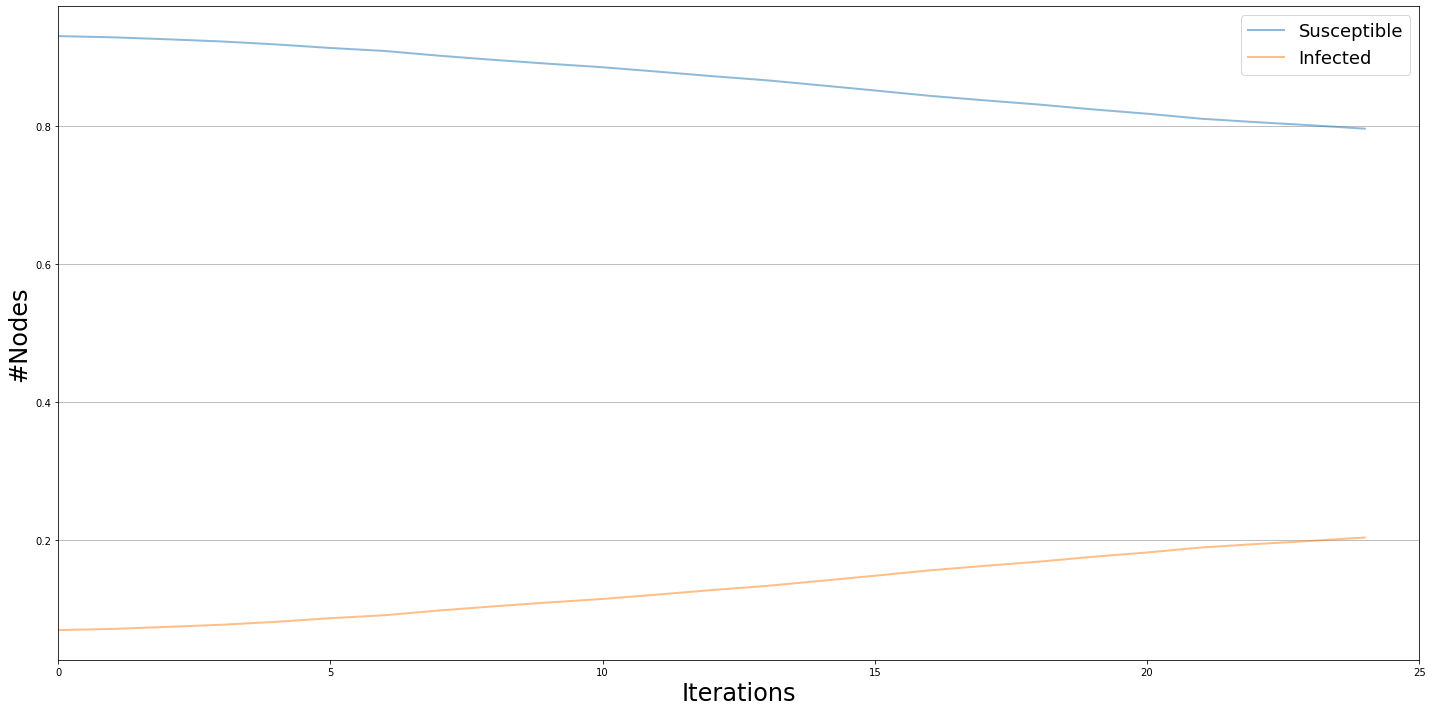

In [299]:
viz = DiffusionTrend(model, trends)
viz.plot()

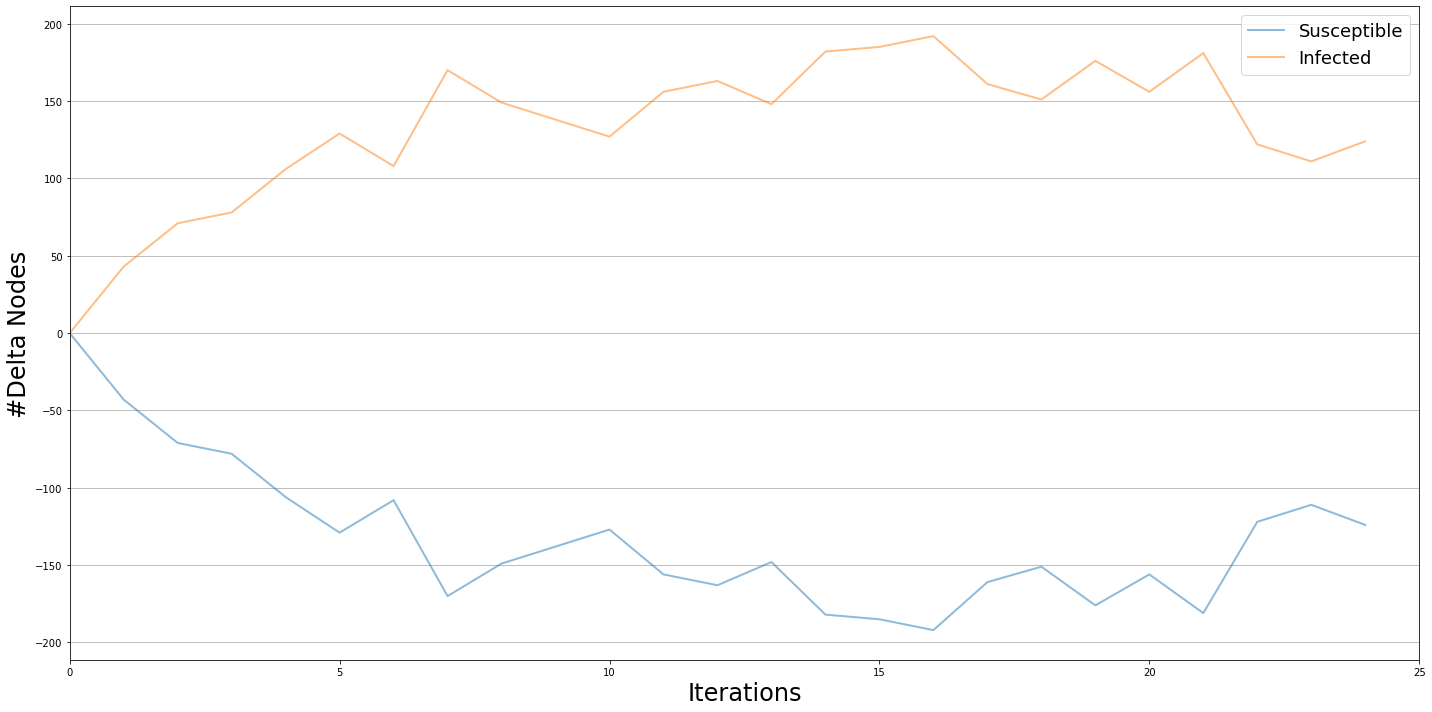

In [300]:
viz = DiffusionPrevalence(model, trends)
viz.plot()